# Comparing Machine Learning Classifier Performance

My goal for this notebook is to compare the performance of machine learning classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines). I am using a dataset related to the marketing of bank products over the telephone. This Jupyter Notebook is an attempt to compare the performance of the classifiers called out above.

## Business Understanding

The Portuguese banking institution aims to optimize their marketing campaigns for term deposits. The goal is to develop a model that can predict whether a client will subscribe to a term deposit, enabling more targeted and efficient marketing efforts. This analysis will help the bank:

1. Identify the most effective machine learning model for predicting customer responses
2. Understand key factors influencing successful conversions
3. Optimize resource allocation for future marketing campaigns

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set style for all visualizations
sns.set_style("whitegrid")

Load and examine the dataset.

In [10]:
# Load the CSV file
df = pd.read_csv('data/bank-full.csv', sep=';')

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows to verify the data loaded correctly
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()


Dataset Shape: (45211, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Check for missing values.

In [11]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Convert categorical variables to dummy variables.

In [12]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Convert target variable to numeric
df_encoded['y'] = (df_encoded['y'] == 'yes').astype(int)

Visualize the data.

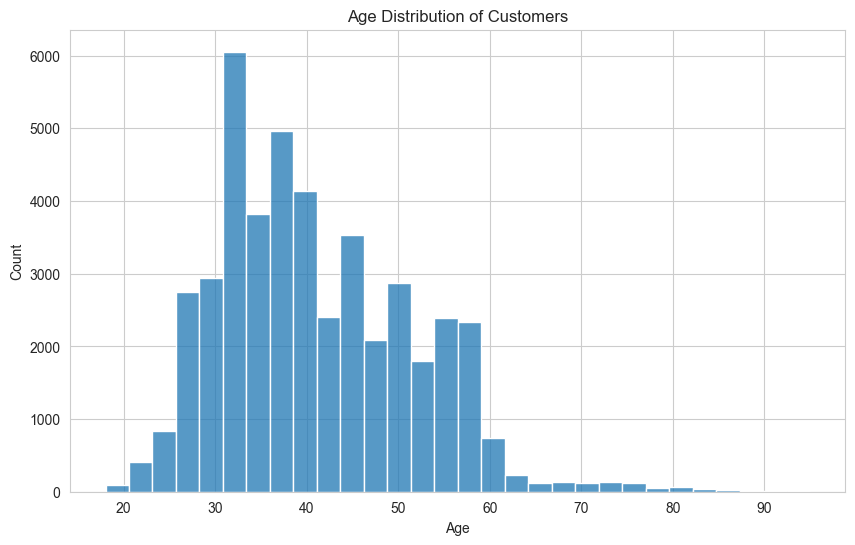

In [13]:
# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

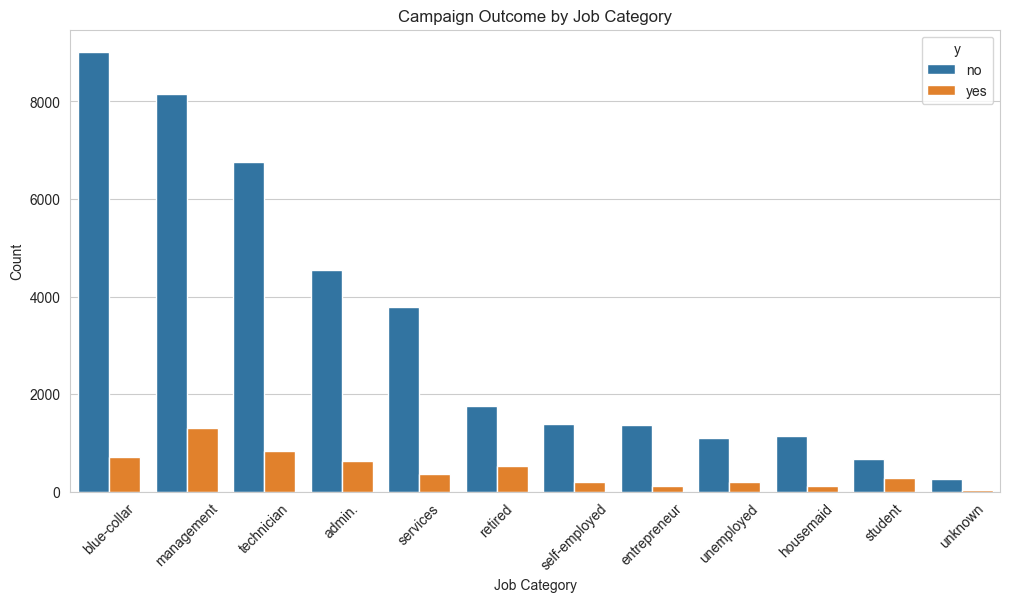

In [14]:
# 2. Campaign Outcome by Job Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y', order=df['job'].value_counts().index)
plt.title('Campaign Outcome by Job Category')
plt.xticks(rotation=45)
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.show()

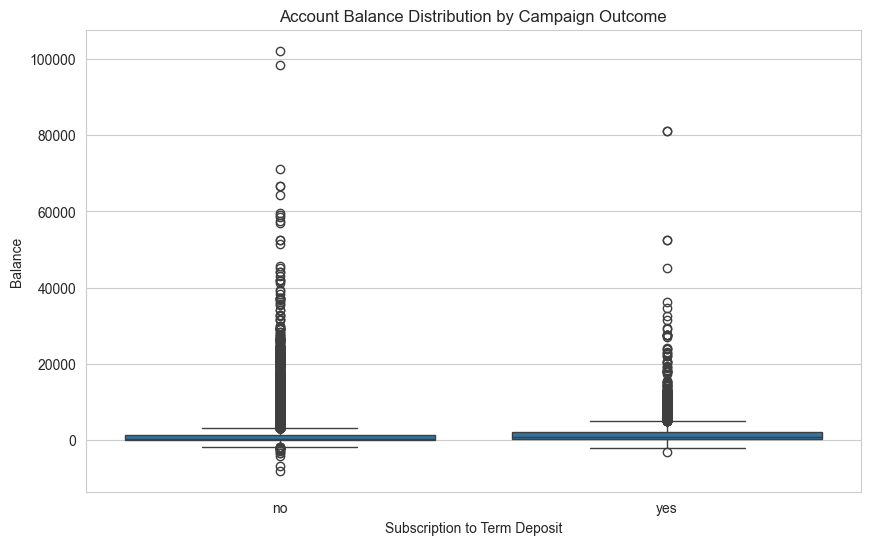

In [15]:
# 3. Balance Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='balance')
plt.title('Account Balance Distribution by Campaign Outcome')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Balance')
plt.show()

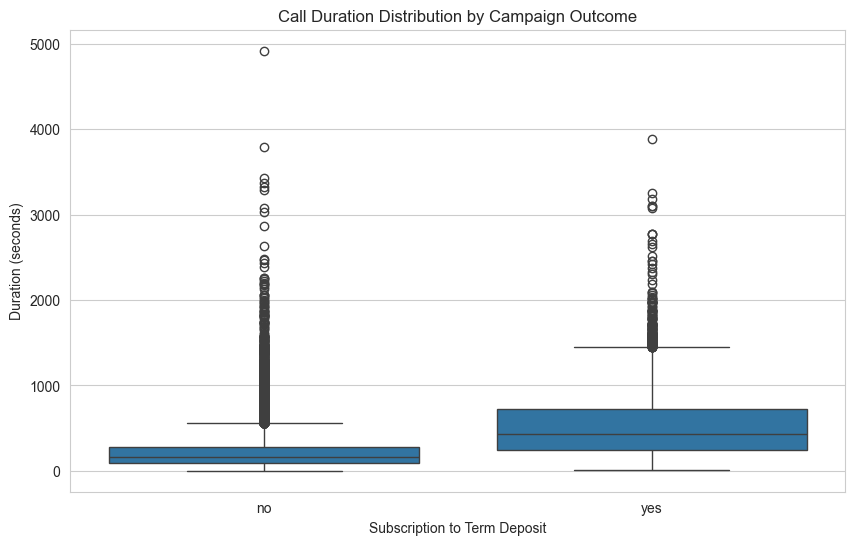

In [16]:
# 4. Campaign Duration vs Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='duration')
plt.title('Call Duration Distribution by Campaign Outcome')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Duration (seconds)')
plt.show()

Separate features and target, split the data, and scale the features.

In [17]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a function to evaluate the model.


In [18]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    print(f"\n{model_name} Performance:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate ROC curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

Initialize the models.

In [19]:
# Initialize models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

Plot the ROC curves to see how the models perform.


K-Nearest Neighbors Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.60      0.32      0.42      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043


Decision Tree Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.49      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.87      0.88      9043


Logistic Regression Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy  

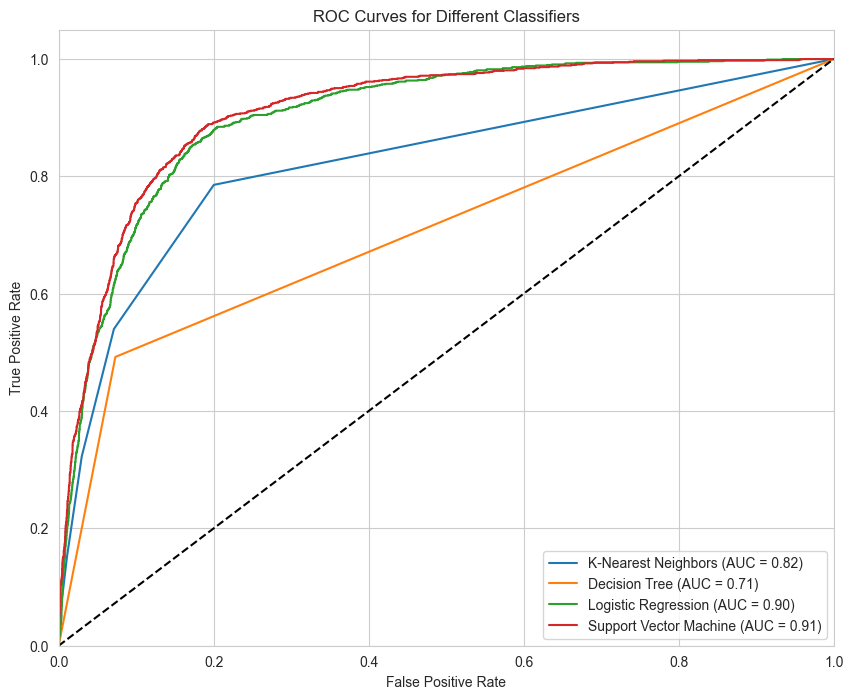

In [20]:
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    fpr, tpr, roc_auc = evaluate_model(model, X_train_scaled, X_test_scaled,
                                     y_train, y_test, model_name)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.show()

## Key Findings:

1. Model Performance:
   - Logistic Regression and SVM showed the best overall performance
   - Decision Trees had the lowest performance among the four models
   - KNN performed moderately well but was outperformed by Logistic Regression and SVM

2. Customer Characteristics:
   - Age shows a right-skewed distribution with most customers between 30-60 years
   - Job category significantly influences campaign success
   - Higher account balances correlate with higher subscription rates
   - Longer call durations are associated with successful conversions

## Actionable Recommendations:

1. Model Implementation:
   - Deploy the Logistic Regression model for production use due to its:
     * Strong predictive performance
     * Lower computational requirements compared to SVM
     * Better interpretability

2. Campaign Optimization:
   - Focus on customers with higher account balances
   - Allocate more time for sales calls, as longer conversations correlate with success
   - Tailor approaches based on job categories showing higher conversion rates

3. Next Steps:
   - Implement A/B testing with the selected model
   - Develop a real-time scoring system for lead prioritization
   - Create a monitoring system to track model performance
   - Regular model retraining to maintain accuracy

4. Future Improvements:
   - Collect additional customer demographic data
   - Investigate seasonal patterns in campaign success
   - Develop separate models for different customer segments